In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [2]:
qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

In [3]:
q0, q1 = qubits

In [4]:
circuit.h(q0)

In [5]:
circuit.cx(q0, q1)

In [6]:
circuit2 = QuantumCircuit(qubits)
circuit2= circuit.copy()

In [7]:
circuit.measure_all()

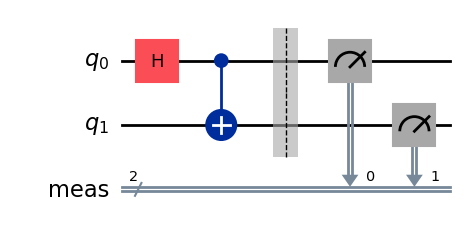

In [8]:
circuit.draw('mpl')

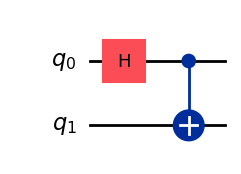

In [9]:
circuit2.draw('mpl')

In [10]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

In [11]:
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")

In [12]:
pass_manager = generate_preset_pass_manager(1, backend=backend)
transpiled = pass_manager.run(circuit2)

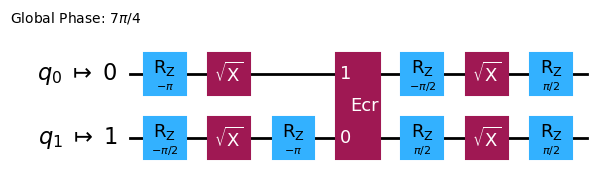

In [13]:
transpiled.draw('mpl', idle_wires=False)

In [14]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator

In [15]:
observable = SparsePauliOp("ZZ")

In [16]:
estimator = Estimator()

In [17]:
job = estimator.run(circuit2, observable)

In [18]:
exact_value = job.result().values[0]

In [19]:
print(exact_value)

1.0
